<a href="https://colab.research.google.com/github/DowookKim/Deep_learing/blob/master/ResNet50_feature_extract_%EC%82%AC%EC%9A%A9_%EB%B0%8F_finetuning_%EB%B0%8F_Explainable_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = ResNet50(include_top = True,
                 #네트워크 상단에 완전연결층을 포함할지 여부를 지정하며, 기본값은 True임

                 weights = "imagenet",
                 #가중치를 의미하며, None(무작위 초기화)과 imagenet(ImageNet에서 사전 훈련된 값)을 지정할 수 있음

                 input_tensor = None,
                 #입력 데이터의 텐서

                 input_shape = None,
                 #입력 이미지에 대한 텐서 크기

                 pooling = None,
                 #None : 마지막 합성곱층이 출력됨
                 #avg : 마지막 합성곱층에 글로벌 평군 플링이 추가됨
                 #max : 마지막 합성곱층에 글로벌 최대 풀링이 추가됨

                 classes = 1000
                 #weights로 'imagenet'을 사용하려면 classes 값이 1000이어야 함. 다른 값으로 사용하고 싶다면 'None'으로 지정
                 )


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [4]:
#GlobalAveragePooling2은 flatten이 일어나기 직전 혹은 마지막 합성곱층에 적용하는 방식으로 각 특성 맵의 평균값을 뽑아 백터로 만든다

In [5]:
model.trainable = False #지금까지 Resnet 모델의 Feature extract만 사용함. 가중치 고정
model = Sequential([model,
                    Dense(2,activation = 'sigmoid')
                    ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [6]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
              )

In [7]:
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "/content/080263/chap5/data/catanddog/train"
valid_dir = "/content/080263/chap5/data/catanddog/validation"


train = ImageDataGenerator(
    #ImageDataGenerator를 사용하면 rescale, shear_range, zoom_range, horizontal_flip과 같은 설정을 할 수 있어 데이터 전처리를 쉽게 할 수 잇음

    rescale = 1./255,

    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1
)


train_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 1,
                                            shuffle = True,
                                            class_mode = "categorical"
                                            )

valid = ImageDataGenerator(rescale = 1.0/255.0)
valid_generator = valid.flow_from_directory(
                                            valid_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 7,
                                            shuffle = True,
                                            class_mode = "categorical"
)

history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = valid_generator,
                    verbose = 2
                    )
#CNN에서는 필터가 업데이트

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 - 28s - 2s/step - accuracy: 0.5169 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
13/13 - 5s - 376ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5204 - val_loss: 0.6931
Epoch 3/10
13/13 - 6s - 466ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
13/13 - 5s - 378ms/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
13/13 - 6s - 452ms/step - accuracy: 0.5273 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
13/13 - 5s - 378ms/step - accuracy: 0.5273 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
13/13 - 6s - 457ms/step - accuracy: 0.5273 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
13/13 - 5s - 387ms/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/10
13/13 - 5s - 394ms/step - accuracy: 0.5273 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6932
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


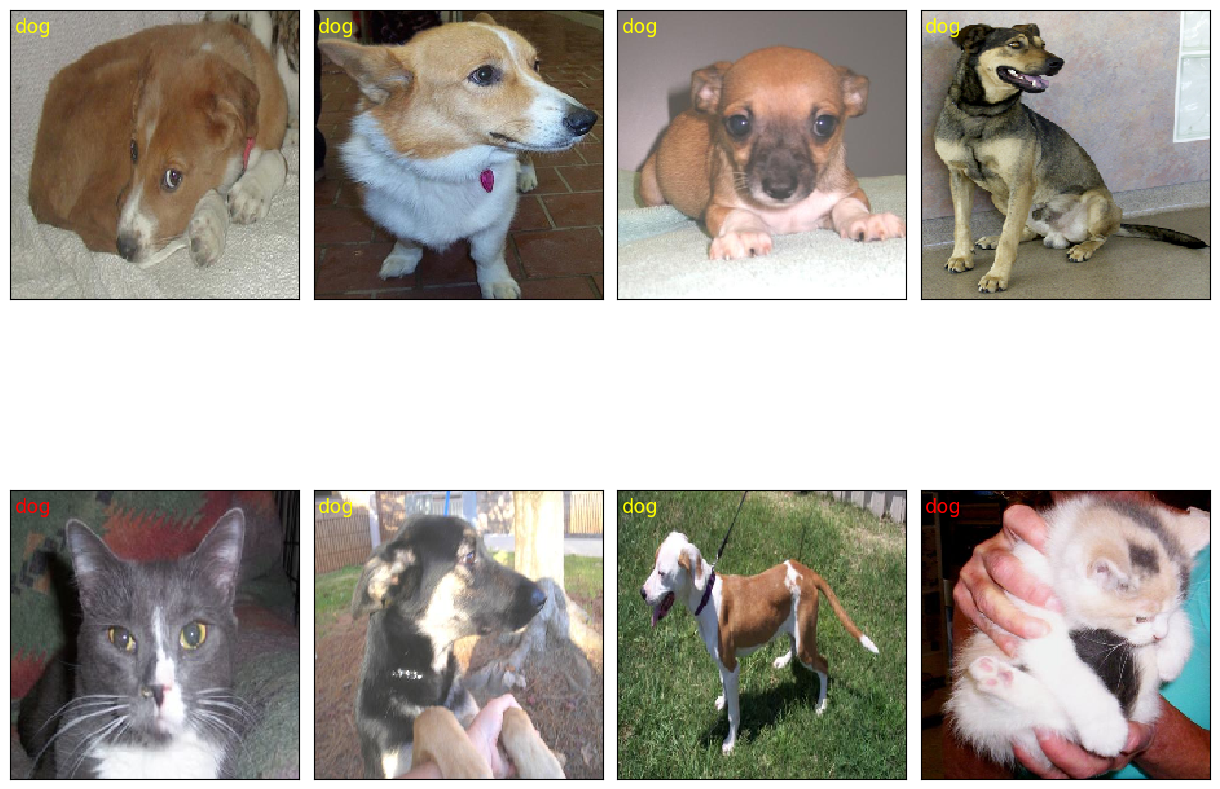

In [9]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
#iter(valid_generator) : 제너레이터를 순회 가능한 iterator로 만든다.
#next(...) : 그 iterator에서 다음 배치를 하나 가져온다.
#validation : 이미지 배치 텐서
  #shape 예시: (BATCH_SIZE, image_height, image_width, 3)
  #범위: 보통 rescale=1/255면 0~1
#label_batch : 그 이미지들의 정답 라벨 배치
#shape 예시: (BATCH_SIZE, 2) (cat/dog 두 클래스)

prediction_values = model.predict(validation)
#방금 뽑은 이미지 배치(validation)를 모델에 넣어 예측을 수행한다.

prediction_values = np.argmax(prediction_values, axis = 1)
#확률 벡터에서 가장 큰 값의 인덱스를 뽑아 “클래스 번호”로 바꾼다.
#prediction이 (BATCH_SIZE, 2)이므로
#각 행(샘플)마다 2개 클래스 중 최대값의 위치를 고른다.

fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.5, wspace = 0.05)

for i in range(8):
  ax = fig.add_subplot(2, 4, i+ 1, xticks = [], yticks = [])
  ax.imshow(validation[i, :], cmap = plt.cm.gray_r, interpolation = 'nearest')
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3, 17, class_names[prediction_values[i]], color = 'yellow', fontsize = 14)
  else:
    ax.text(3, 17, class_names[prediction_values[i]], color = 'red', fontsize = 14)

# 미세 조정 기법
: 사전 훈련된 네트워크를 미세 조정하여 분석하려는 데이터셋에 잘 맞도록 모델의 파라미터를 조정하는 기법

데이터셋의 크기와 사전 훈련된 모델에 따라
1.   **데이터셋이 크고 사전 훈련된 모델과 유사성이 작을 경우** -> 모델 전체를 재학습
2.   **데이터셋이 크고 사전 훈련된 모델과 유사성이 클 경우** -> 합성곱층의 뒷부분(완전연결층과 가까운 부분)과 데이터 분류기를 학습 : 데이터셋이 유사하기 때문에 전체를 학습시키는 것보다는 강한 특징이 나타나(합성곱층의 뒤로 갈수록 점점 과제 특화가 되있는 특징을 학습한다, 앞으로 갈수록 엣지, 선 이런 이미지들의 공통적인 부분들을 학습함)는 합성곱층의 뒷부분과 데이터 분류기만 새로 학습하더라도 최적의 성능을 낼 수 있음
3.   **데이터셋이 작고 사전 훈련된 모델과 유사성이 작을 경우** -> 합성곱층의 일부분과 데이터 분류기를 학습시킴 : 데이터가 적기 때문에 일부 계층에 미세 조정 기법을 적용한다고 해도 효과가 없을 수 있음. 따라서 합성곱층 중 어디까지 새로 학습시켜야 할지 적당히 설정해주어야 함
4.   **데이터셋이 작고 사전 훈련된 모델과 유사성이 클 경우** -> 데이터 분류기만 학습시킴. 데이터가 적기 때문에 많은 계층에 미세 조정 기법을 적용하면 과적합이 발생할 수 있음. 따라서 최종 데이터 분류기인 완전연결층에 대해서만 미세 조정 기법을 적용함



# 설명 가능한 CNN (explainable CNN)
CNN은 블랙박스와 같아 내부에서 어떻게 동작하는지 설명하기 여러움 -> CNN 처리 과정을 시각화해야 함
CNN 시각화 방법에는 필터에 대한 시각화와 특성 맵에 대한 시각화가 있음
특성 맵(feature map)은 입력 이미지 또는 다른 특성 맵처럼 필터를 입력에 적용한 결과


In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape = (100, 100, 3), activation = 'relu', kernel_size = (5, 5), filters = 32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu') ,
    tf.keras.layers.Dense(32, activation = 'relu')  ,
    tf.keras.layers.Dense(2, activation = 'softmax') ,
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,922 (1.15 MB)

 Trainable params: 301,922 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
ins = model.inputs # 모델 입력으로 (None, 100, 100, 3)의 형태
outs = model.layers[0].output # 첫 번째 계층에 대한 출력으로 (None, 96, 96, 32)의 형태
feature_map = Model(inputs = ins, outputs = outs) # ins와 outs를 모델 입력과 출력으로 사용하여 특성 맵을 정의
feature_map.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432 (9.50 KB)

 Trainable params: 2,432 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

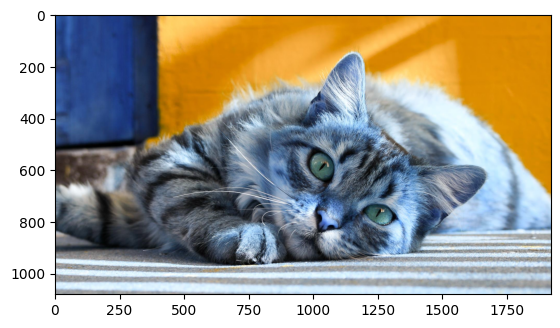

In [19]:
img = cv2.imread("/content/080263/chap5/data/cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
(1, 96, 96, 32)


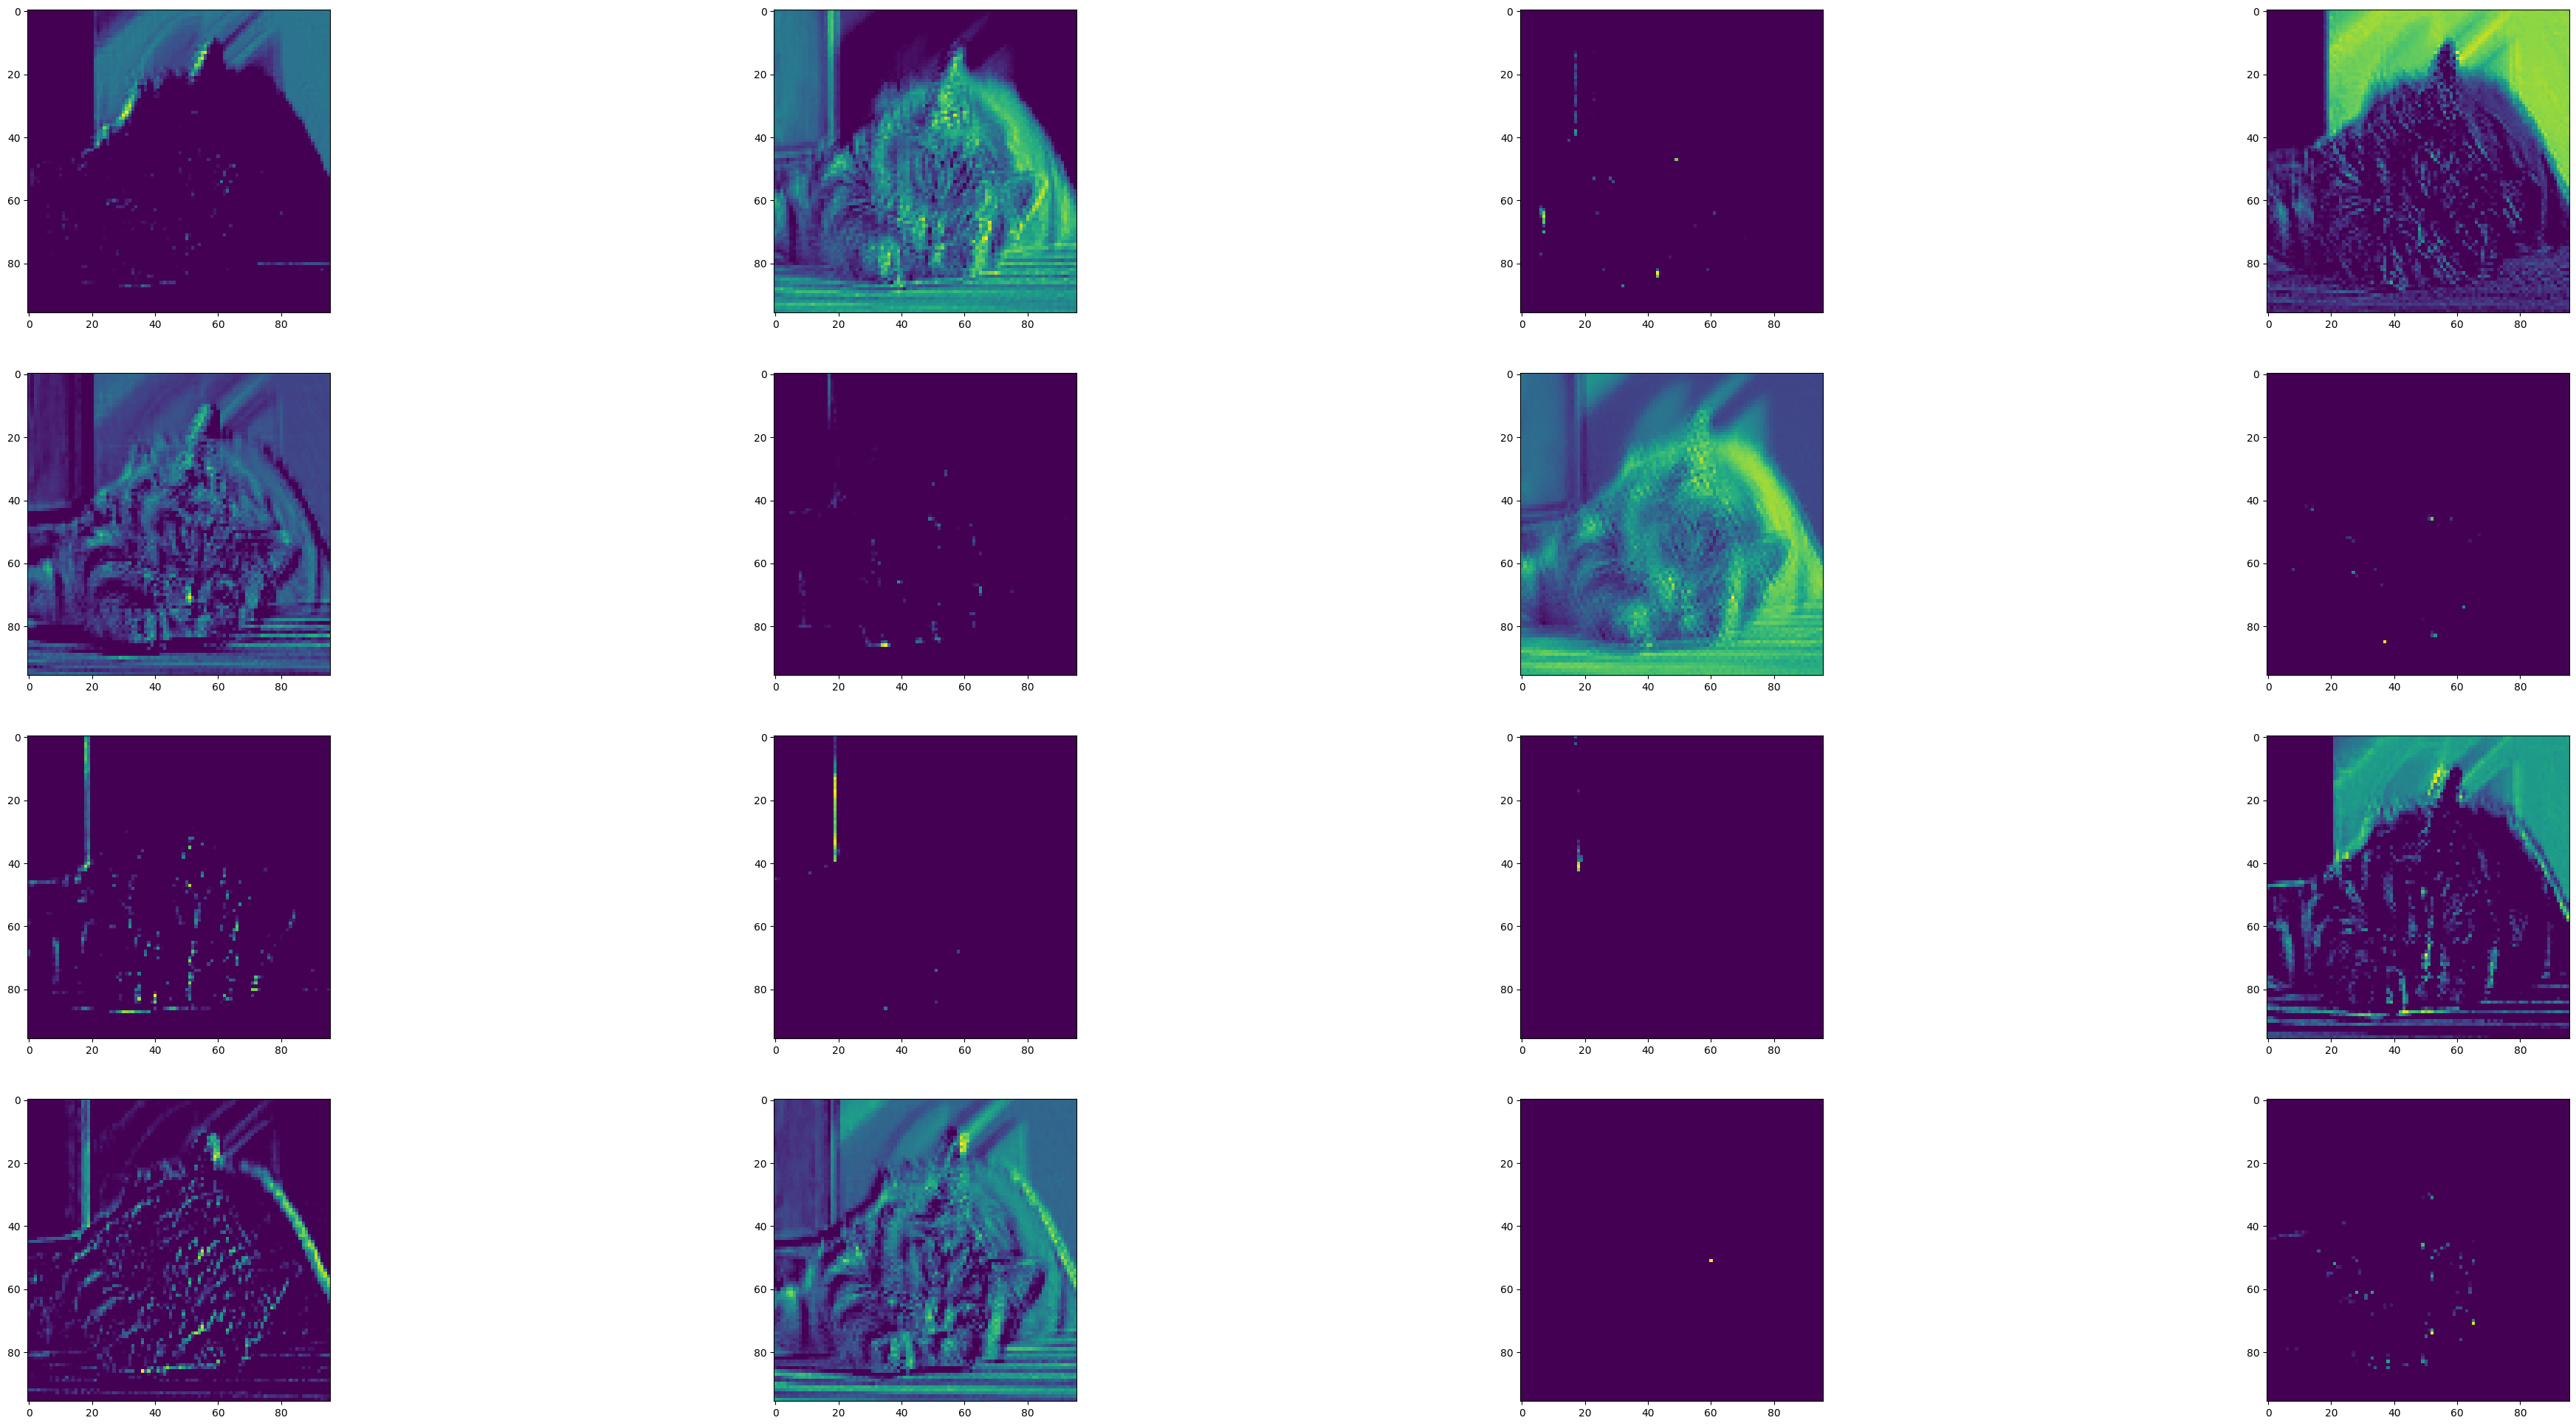

In [26]:
img = cv2.resize(img, (100, 100)) # 이미지 크기 조정
input_img = np.expand_dims(img, axis = 0) # 이미지 차원 조정
print(input_img.shape)

feature = feature_map.predict(input_img) # 이미지를 모델에 적용
print(feature.shape)
fig = plt.figure(figsize = (50,50))
for i in range(16):
  ax = fig.add_subplot(8, 4, i + 1)
  ax.imshow(feature[0, :, :, i])

입력층과 가까운 계층으로 입력 이미지의 형태가 많이 유지되고 있음

(None, 44, 44, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


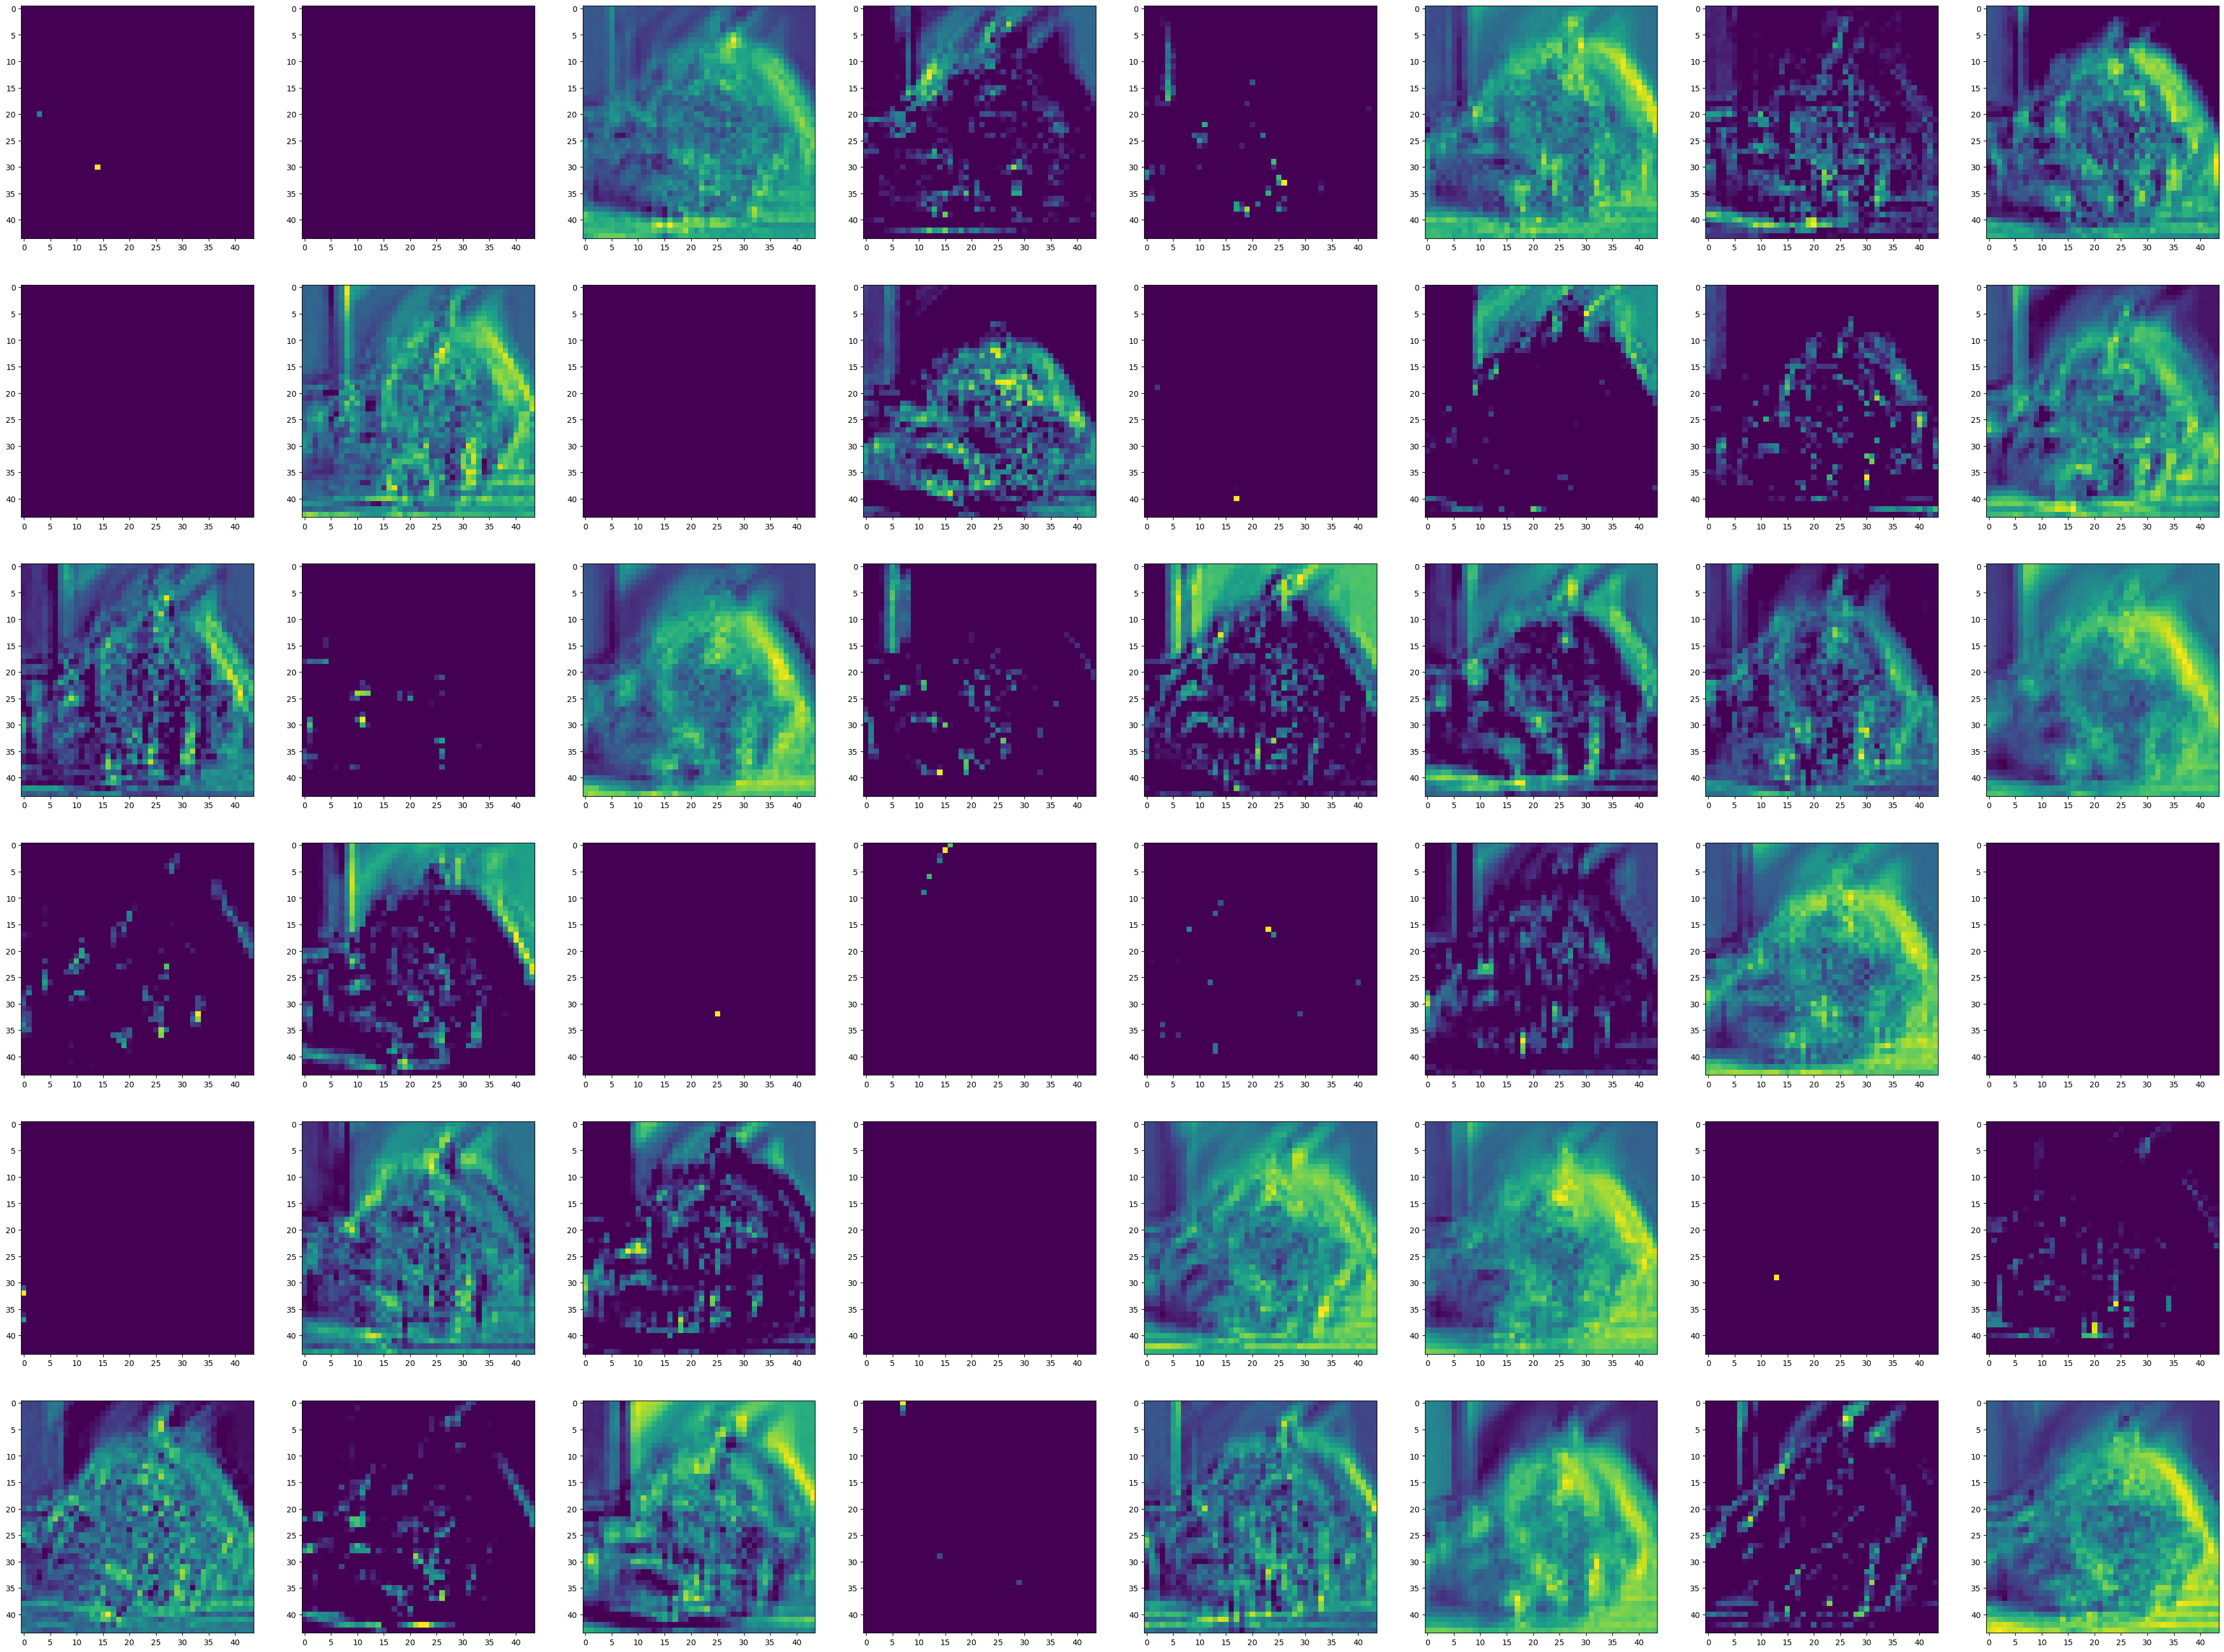

In [29]:
#두 번째 계층에 대한 특성 맵
ins = model.inputs # 모델 입력으로 (None, 100, 100, 3)의 형태를 가짐
outs = model.layers[2].output
print(outs.shape)
feature_map = Model(inputs = ins, outputs = outs)

img = cv2.imread("/content/080263/chap5/data/cat.jpg")
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis = 0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize = (50, 50))
for i in range(48):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(feature[0, :, :, i])

아직까지는 첫 번째 계층과 큰 차이가 없어 보임. 여전히 고양이 형태는 유지함

(None, 5, 5, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


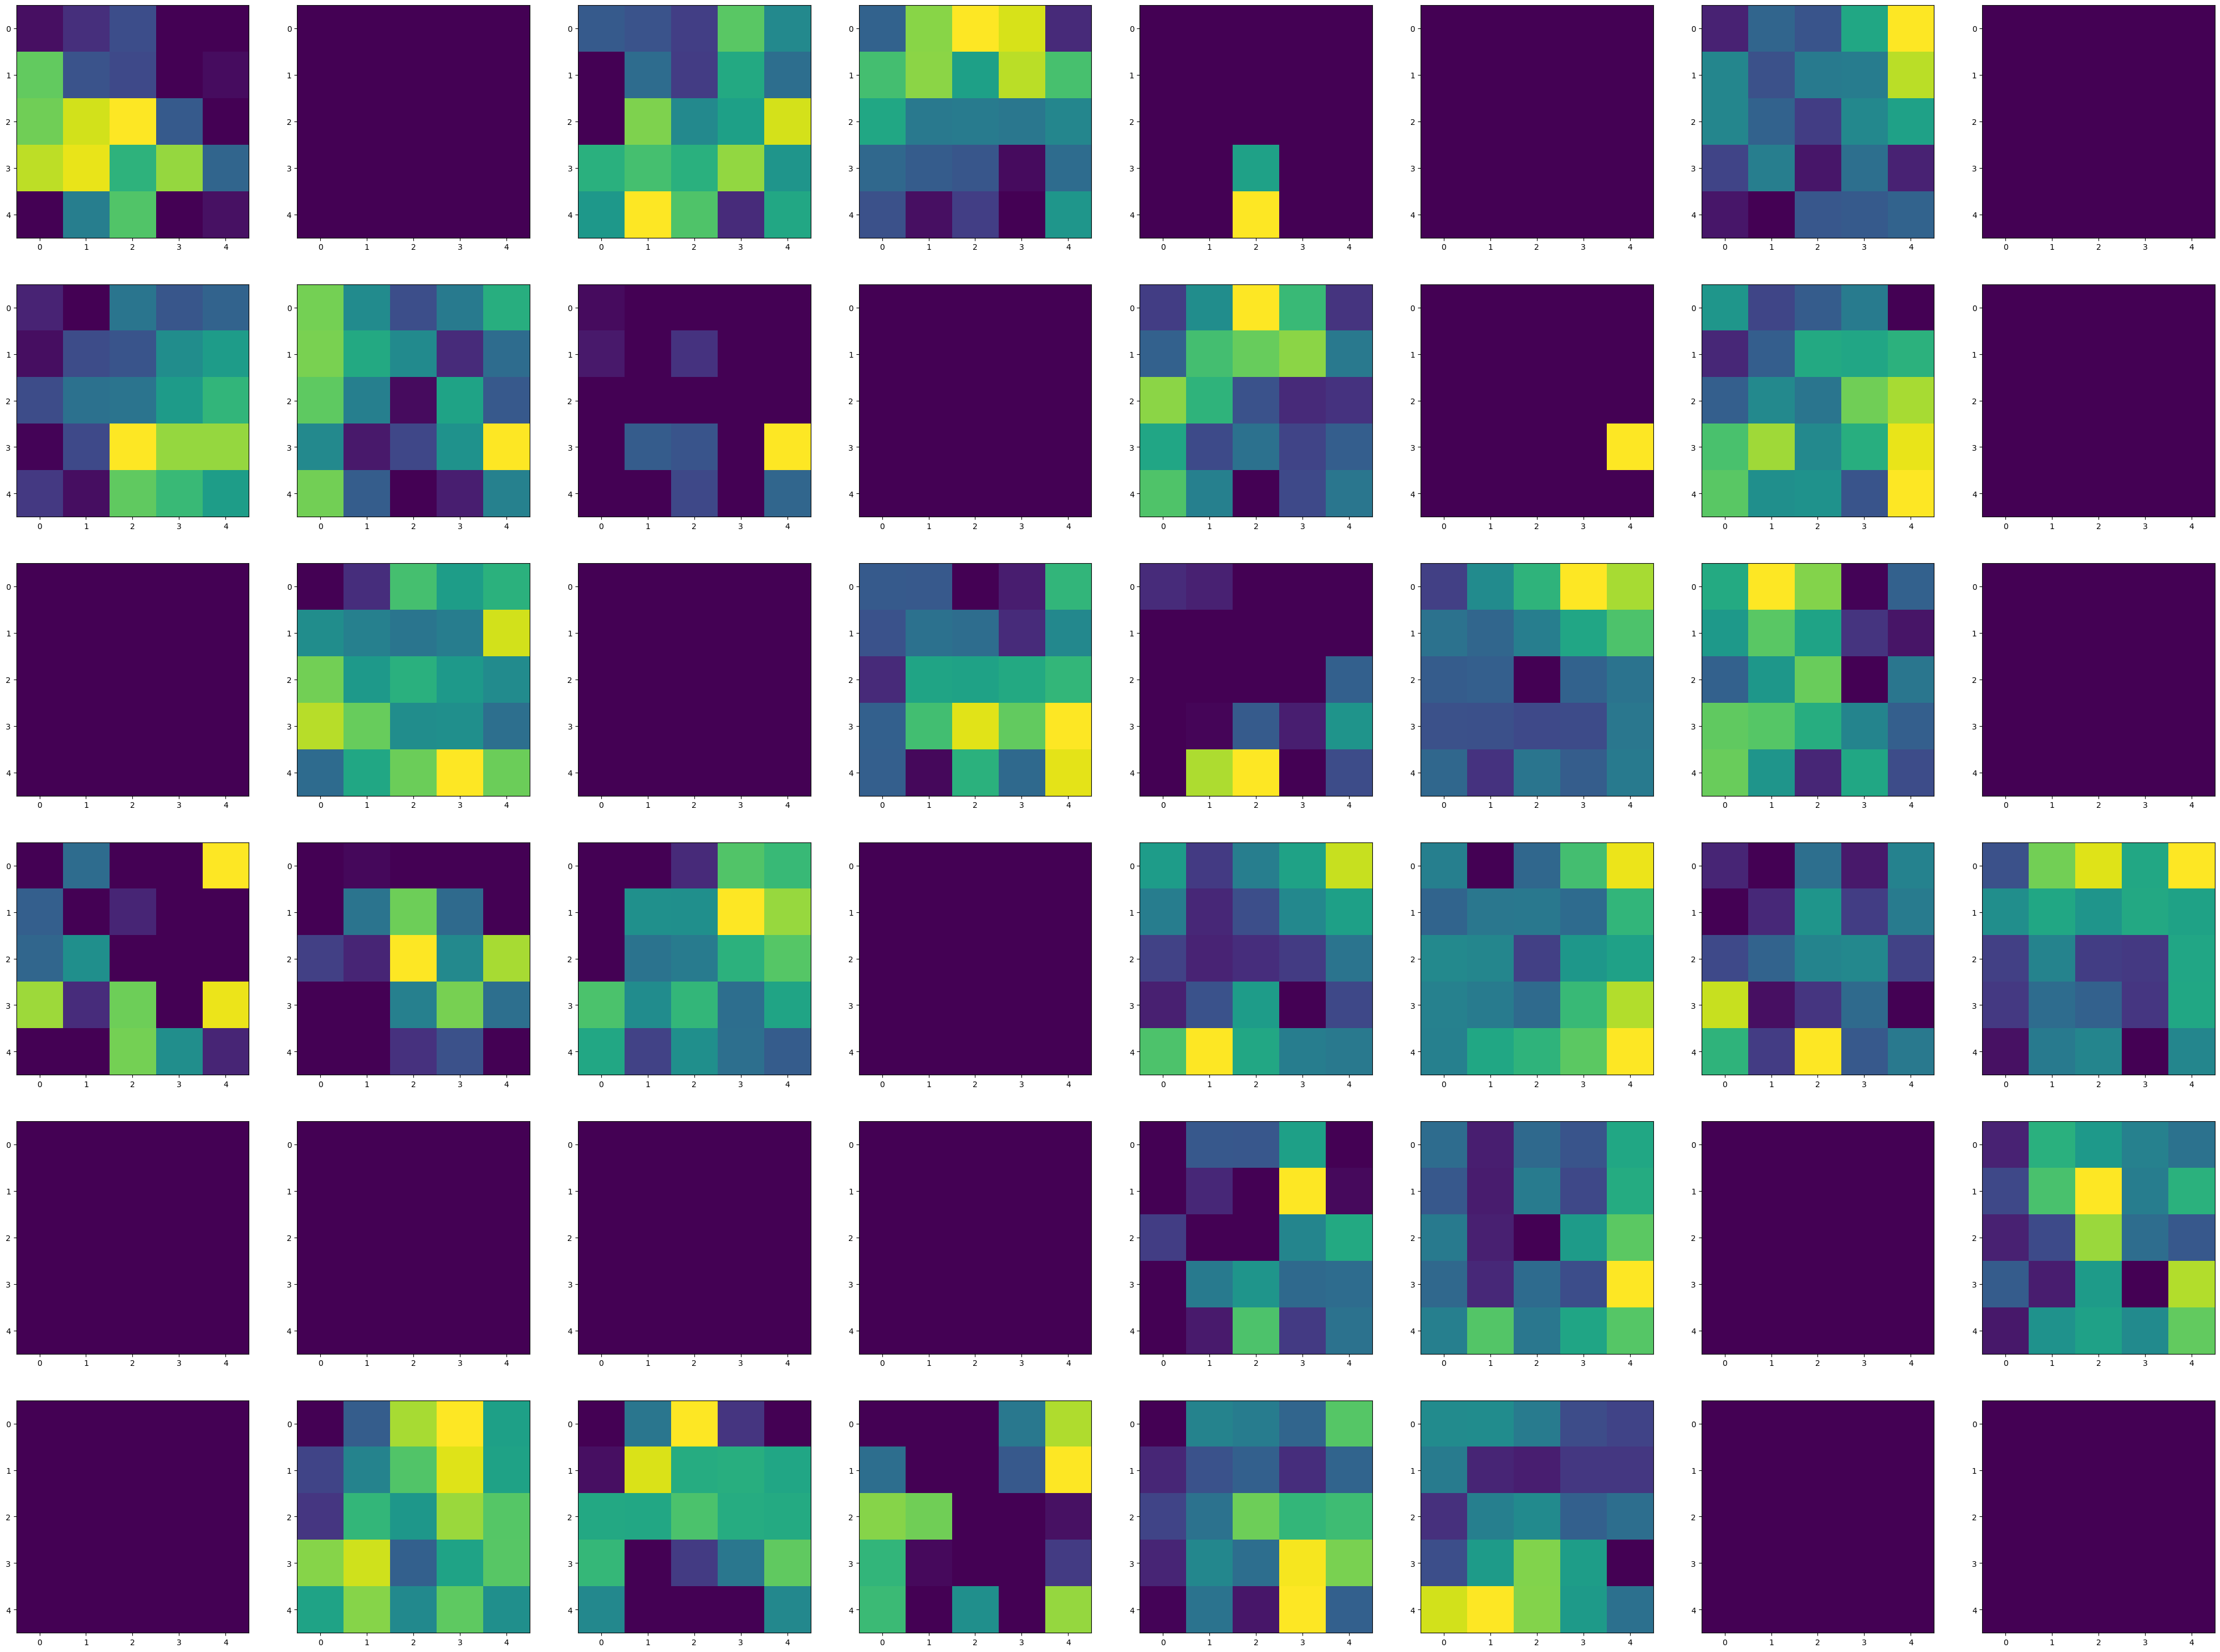

In [30]:
#여섯 번째 계층에 대한 특성 맵
ins = model.inputs # 모델 입력으로 (None, 100, 100, 3)의 형태를 가짐
outs = model.layers[6].output
print(outs.shape)
feature_map = Model(inputs = ins, outputs = outs)

img = cv2.imread("/content/080263/chap5/data/cat.jpg")
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis = 0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize = (50, 50))
for i in range(48):
  ax = fig.add_subplot(8, 8, i + 1)
  ax.imshow(feature[0, :, :, i])

이제 원래 입력 이미지의 형태는 전혀 찾아볼 수 없음.
출력층에 가까울수록 원래 형태는 찾아볼 수 없고 이미지 특징들만 전달되는 것을 확인할 수 있음